#  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline
print(Path.cwd())

/Users/mannyrussell/Desktop/whale_portfolio


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
whale_returns_df[whale_returns_df["SOROS FUND MANAGEMENT LLC"].isna()==True]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN


In [7]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
 
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [10]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True) 
sp500_history_df.sort_index(ascending = True, inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types

sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype("float")

sp500_history_df.sort_index(inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
# Calculate Daily Returns
daily_returns = sp500_history_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [17]:
# Rename Column
daily_returns.columns = ['S&P 500']
daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

In [20]:
combined_df.head(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539


In [21]:
combined_df.tail(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


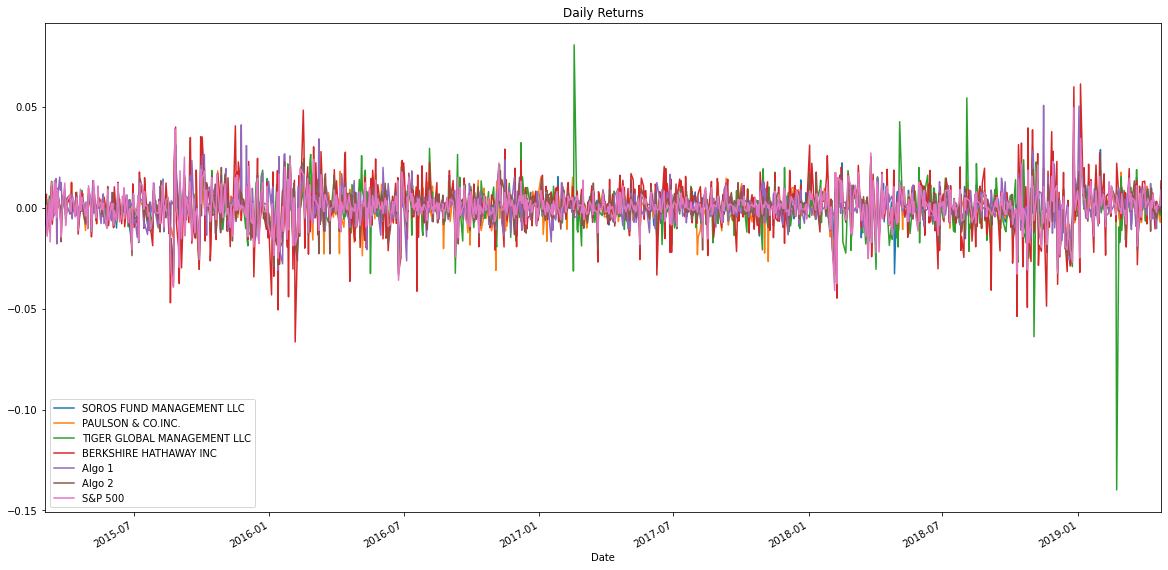

In [22]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(xlim=("2015-03-03", "2019-04-23"), figsize=(20,10), title="Daily Returns")

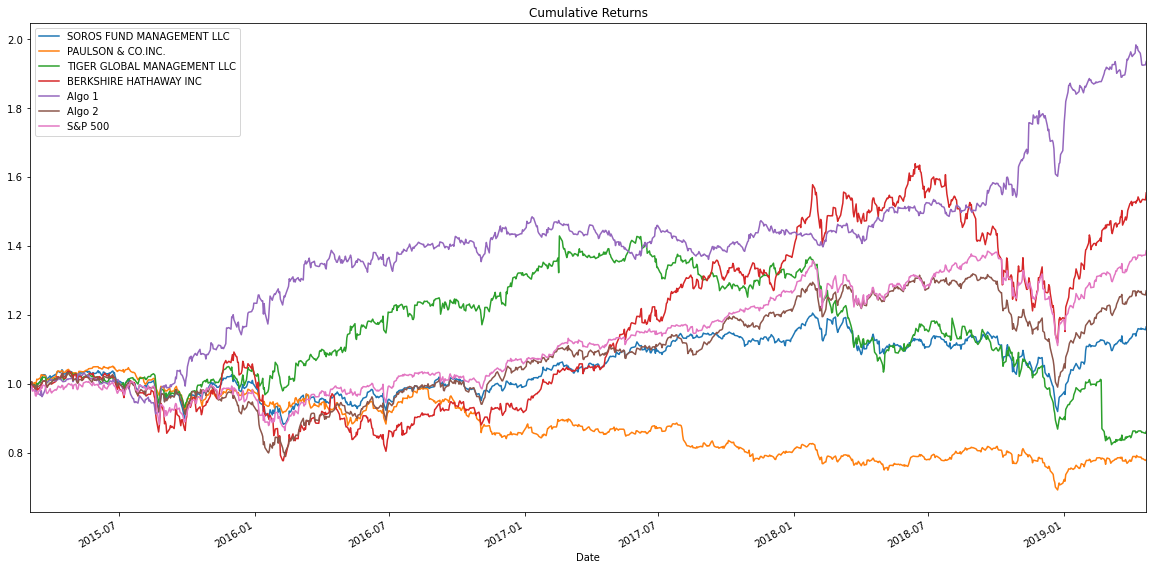

In [23]:
# Plot cumulative returns
cumulative_returns_df = (1+ combined_df).cumprod()
cumulative_returns_df.plot(xlim=("2015-03-03", "2019-04-23"),figsize = (20,10), title = "Cumulative Returns") 

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

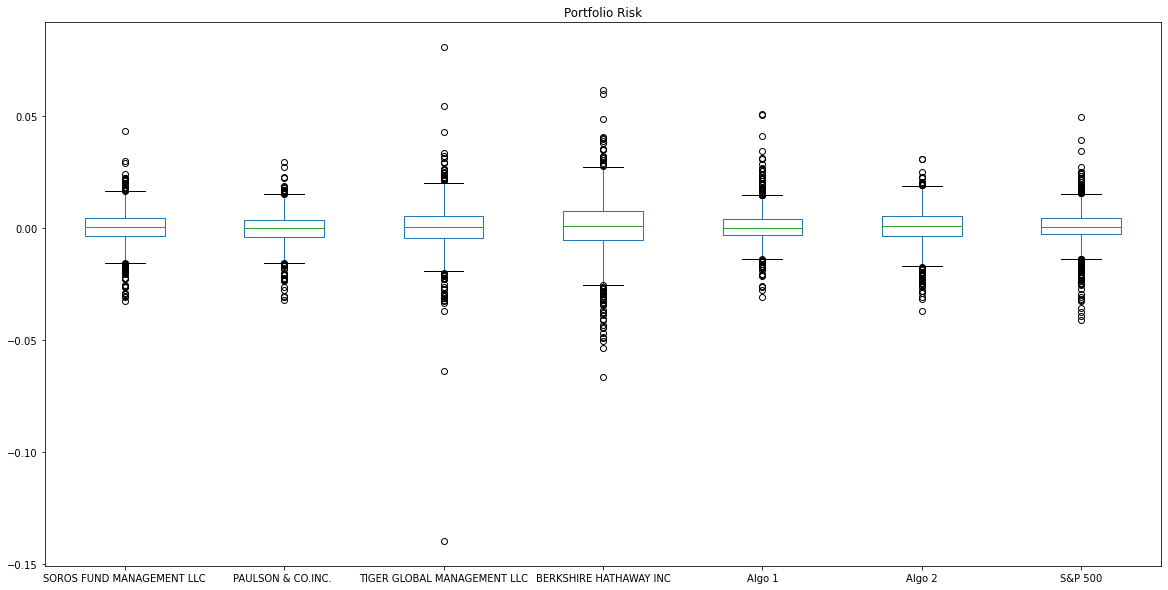

In [24]:
# Box plot to visually show risk
combined_df.plot.box(figsize = (20,10), title = "Portfolio Risk")

In [25]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std_df = combined_df.std()
daily_std_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

Tiger Global Management LLC and Berkshire Hathaway Inc are **both** riskier than the S&P 500.

In [26]:
# Determine which portfolios are riskier than the S&P 500
riskier_std = daily_std_df > daily_std_df.loc["S&P 500"]
riskier_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_df*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

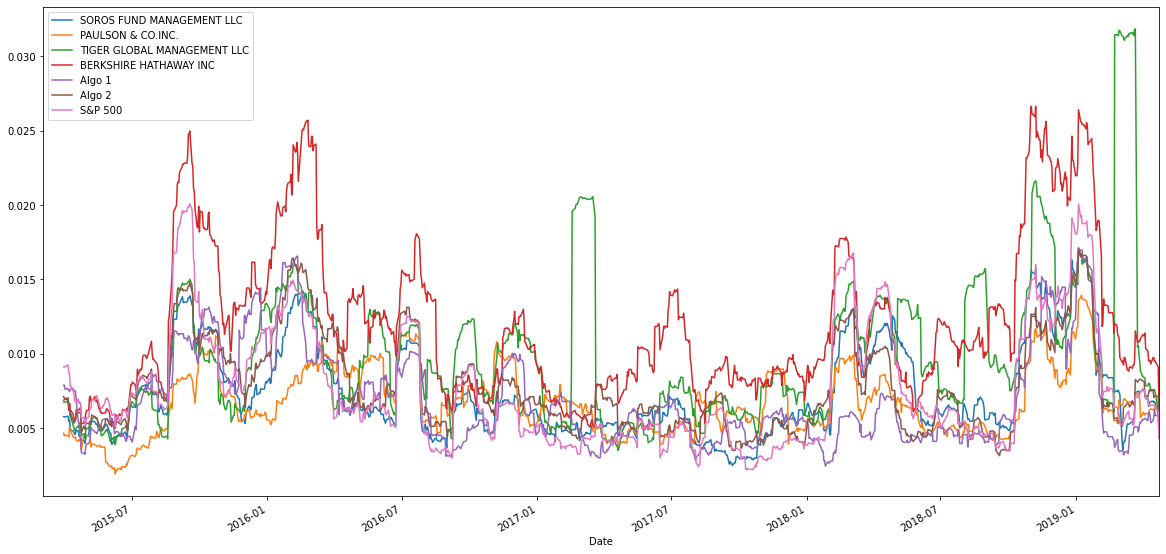

In [28]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_21 = combined_df.rolling(window = 21).std()
rolling_21.plot(xlim=("2015-03-03", "2019-04-23"), figsize = (20,10))

In [29]:
# Construct a correlation table

cm = sns.light_palette("orange", as_cmap=True)
corr_combined_df = combined_df.corr()

s = corr_combined_df.style.background_gradient(cmap=cm)

s

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


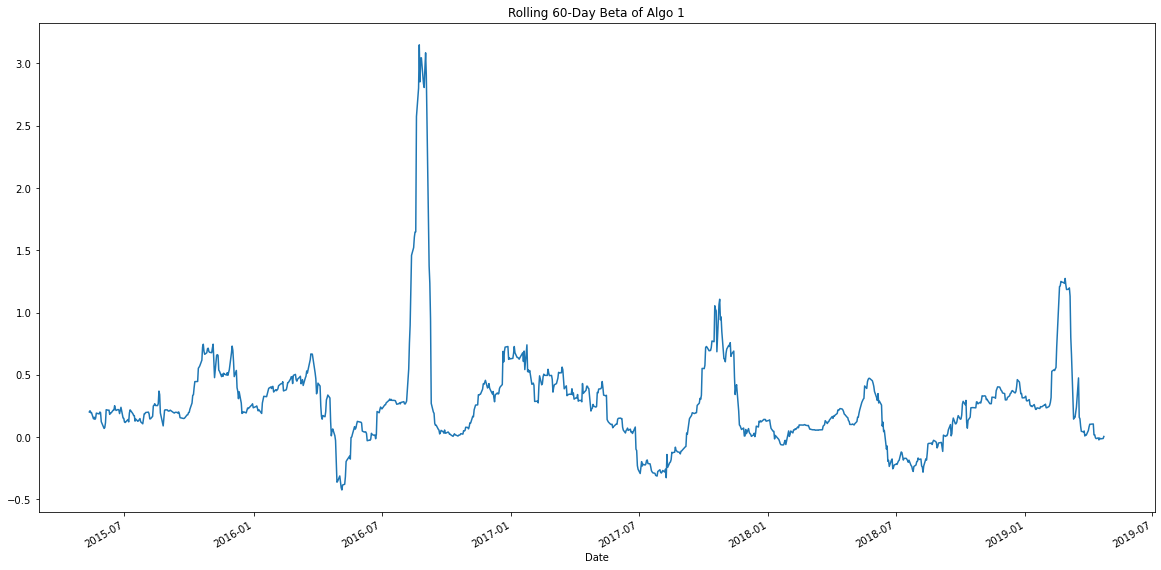

In [30]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
algo_covariance = combined_df['Algo 1'].rolling(window=50).cov(combined_df['S&P 500'])
sp500_variance = combined_df['S&P 500'].rolling(window=30).var()
algo_beta = algo_covariance / sp500_variance
algo_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

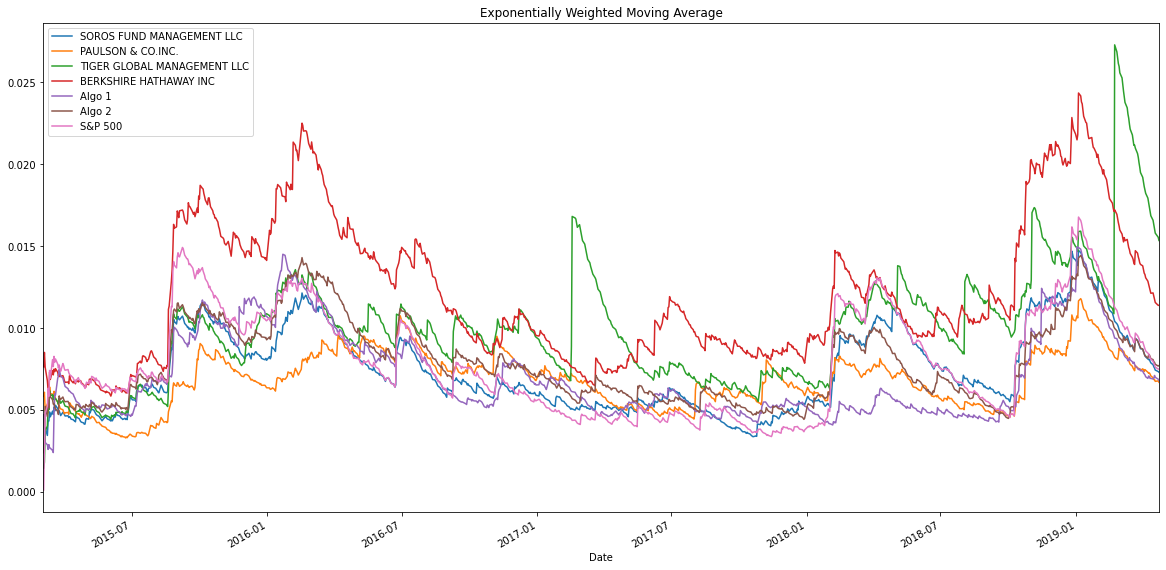

In [31]:
# Calculate a rolling window using the exponentially weighted moving average. 
ewma = combined_df.ewm(halflife = 21, adjust = False).std()
# ewma = combined_df.rolling(window=21).std()
ewma.plot(xlim=("2015-03-03", "2019-04-23"),figsize = (20,10), title = "Exponentially Weighted Moving Average")

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [32]:
# Calculate annualized Sharpe Ratios
ann_sharpe_ratio = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252))
ann_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

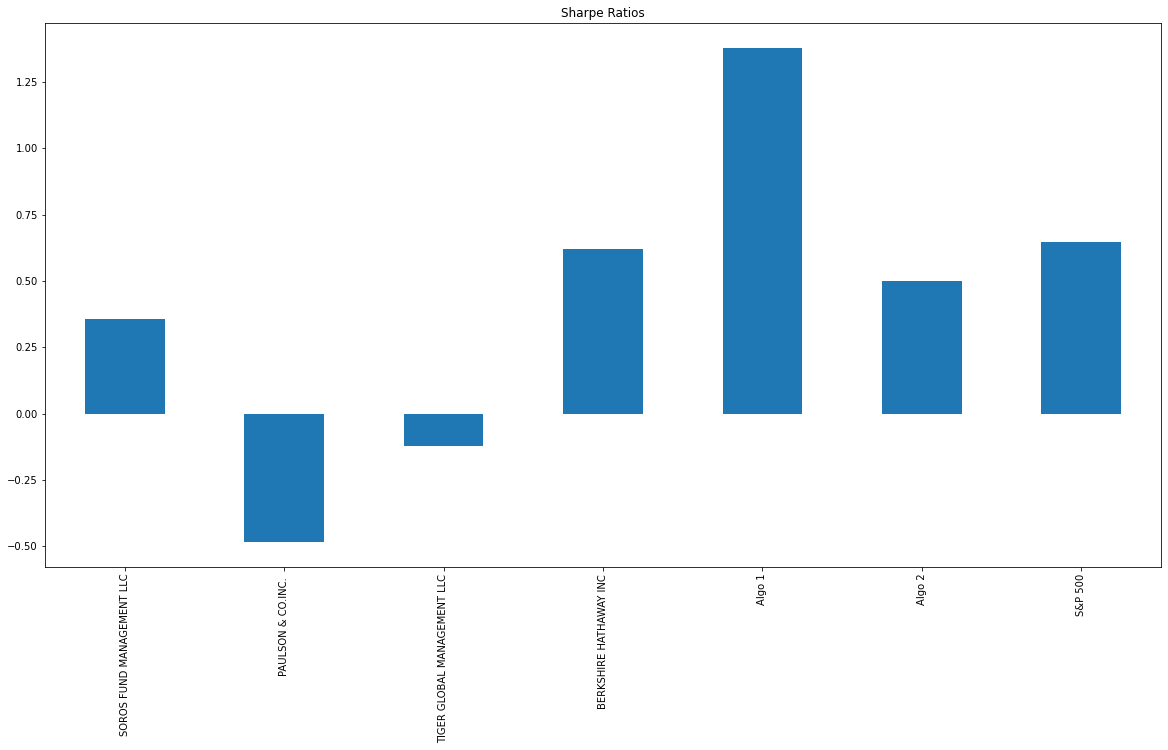

In [33]:
# Visualize the sharpe ratios as a bar plot
ann_sharpe_ratio.plot.bar(figsize = (20,10), title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

Algo 1 outperforms the market & the whales. While Algo 2 slightly underperforms both the market and the whales.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Read the first stock
xlk_csv = Path("Resources/XLK_hist.csv")
xlk_historical_df = pd.read_csv(xlk_csv, index_col = "Date", parse_dates=True,infer_datetime_format=True)
xlk_historical_df.rename(columns={"Close":"XLK"}, inplace=True)
xlk_historical_df.index = xlk_historical_df.index.date
xlk_historical_df.sort_index(inplace=True)
xlk_historical_df.head()

,XLK
2013-03-05,30.18
2013-03-06,30.16
2013-03-07,30.23
2013-03-08,30.29
2013-03-11,30.36


In [38]:
# Read the second stock
arkw_csv = Path("Resources/ARKW_hist.csv")
arkw_historical_df = pd.read_csv(arkw_csv, index_col = "Date", parse_dates=True,infer_datetime_format=True)
arkw_historical_df.rename(columns={"Close":"ARKW"}, inplace=True)
arkw_historical_df.index = arkw_historical_df.index.date
arkw_historical_df.sort_index(inplace=True)
arkw_historical_df.head()

,ARKW
2014-09-30,19.99
2014-10-01,19.55
2014-10-02,19.43
2014-10-03,20.14
2014-10-06,19.97


In [41]:
# Read the third stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_historical_df = pd.read_csv(aapl_csv, index_col = "Date", parse_dates=True,infer_datetime_format=True)
aapl_historical_df.rename(columns={"Close":"AAPL"}, inplace=True)
aapl_historical_df.index = aapl_historical_df.index.date
aapl_historical_df.sort_index(inplace=True)
aapl_historical_df.head()

,AAPL
2018-11-05,50.40
2018-11-06,50.94
2018-11-07,52.49
2018-11-08,52.12
2018-11-09,51.12


In [43]:
# Concatenate all stocks into a single DataFrame
my_portfolio_df = pd.concat([xlk_historical_df, arkw_historical_df, aapl_historical_df], axis = 'columns', join="inner")
my_portfolio_df.sort_index(inplace=True)
my_portfolio_df.head()

,XLK,ARKW,AAPL
2018-11-05,68.67,54.51,50.40
2018-11-06,69.10,54.50,50.94
2018-11-07,71.13,56.12,52.49
2018-11-08,71.07,54.86,52.12
2018-11-09,69.84,53.55,51.12


In [50]:
# Reset the index
my_portfolio_df.reset_index(drop = True)
my_portfolio_df.head()

,XLK,ARKW,AAPL
2018-11-05,68.67,54.51,50.40
2018-11-06,69.10,54.50,50.94
2018-11-07,71.13,56.12,52.49
2018-11-08,71.07,54.86,52.12
2018-11-09,69.84,53.55,51.12


In [61]:
# Would not work even though it was was working before I broke it
# table = pd.pivot_table(my_portfolio_df, index=('Date'), columns=("Symbol"))


In [65]:
#Starter code or instruction did not add this step even though it was required above
mr_combined_returns= my_portfolio_df.pct_change()
mr_combined_returns.head()

,XLK,ARKW,AAPL
2018-11-05,NaN,NaN,NaN
2018-11-06,0.006262,-0.000183,0.010714
2018-11-07,0.029378,0.029725,0.030428
2018-11-08,-0.000844,-0.022452,-0.007049
2018-11-09,-0.017307,-0.023879,-0.019186


In [66]:
# Drop Nulls
mr_combined_returns.dropna(inplace=True)
mr_combined_returns.head()

,XLK,ARKW,AAPL
2018-11-06,0.006262,-0.000183,0.010714
2018-11-07,0.029378,0.029725,0.030428
2018-11-08,-0.000844,-0.022452,-0.007049
2018-11-09,-0.017307,-0.023879,-0.019186
2018-11-12,-0.035223,-0.039029,-0.050469


In [68]:
# Calculate weighted portfolio returns
weights = [.33, .33, .33]
wght_port_returns = mr_combined_returns.dot(weights)
wght_port_returns.head()


2018-11-06    0.005542
2018-11-07    0.029545
2018-11-08   -0.010014
2018-11-09   -0.019923
2018-11-12   -0.041158
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [81]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
total_returns_df = pd.concat((wght_port_returns, combined_df), axis = 'columns' , join = "inner")
total_returns_df = total_returns_df.rename(columns = {0:"MR Portfolio"})
total_returns_df.head(10)



,MR Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-11-06,0.005542,0.002419,0.018754,0.014527,0.001694,-0.001620,0.004327,0.006259
2018-11-07,0.029545,0.013337,0.005449,0.011902,0.026836,0.003825,0.014371,0.021209
2018-11-08,-0.010014,-0.010045,-0.004841,-0.006052,-0.028507,0.000806,0.000228,-0.002509
2018-11-09,-0.019923,-0.012145,-0.006838,0.004150,-0.018639,0.008069,-0.013437,-0.009199
2018-11-12,-0.041158,-0.018184,-0.009606,-0.010554,-0.021559,0.007258,-0.015428,-0.019701
2018-11-13,0.001425,0.000000,0.000000,0.000000,0.000000,-0.007843,-0.001947,-0.001482
2018-11-14,-0.014187,-0.001917,-0.008304,-0.010577,0.006289,0.003043,-0.009250,-0.007567
2018-11-15,0.026678,0.006886,0.006806,0.000901,0.019773,0.050735,0.008930,0.010594
2018-11-16,-0.001985,0.005377,-0.000211,-0.002211,-0.009001,0.000233,0.002852,0.002223
2018-11-19,-0.044552,-0.017277,-0.012187,-0.009246,-0.048750,-0.002182,-0.017076,-0.016643


In [83]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns_df.dropna()


,MR Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-11-06,0.005542,0.002419,0.018754,0.014527,0.001694,-0.001620,0.004327,0.006259
2018-11-07,0.029545,0.013337,0.005449,0.011902,0.026836,0.003825,0.014371,0.021209
2018-11-08,-0.010014,-0.010045,-0.004841,-0.006052,-0.028507,0.000806,0.000228,-0.002509
2018-11-09,-0.019923,-0.012145,-0.006838,0.004150,-0.018639,0.008069,-0.013437,-0.009199
2018-11-12,-0.041158,-0.018184,-0.009606,-0.010554,-0.021559,0.007258,-0.015428,-0.019701
...,...,...,...,...,...,...,...,...
2019-04-15,-0.002442,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629
2019-04-16,0.004925,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.004924,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001108,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [94]:
# Risk
portfolio_std = pd.DataFrame(total_returns_df.std()).rename(columns = {0:"std"})
portfolio_std

,std
MR Portfolio,0.018671
SOROS FUND MANAGEMENT LLC,0.010358
PAULSON & CO.INC.,0.008536
TIGER GLOBAL MANAGEMENT LLC,0.016732
BERKSHIRE HATHAWAY INC,0.016691
Algo 1,0.010000
Algo 2,0.010342
S&P 500,0.011310


In [96]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["S&P 500", "std"]]
higher_std

,std
MR Portfolio,0.018671
TIGER GLOBAL MANAGEMENT LLC,0.016732
BERKSHIRE HATHAWAY INC,0.016691


MR Portfolio is the riskiest portfolio.



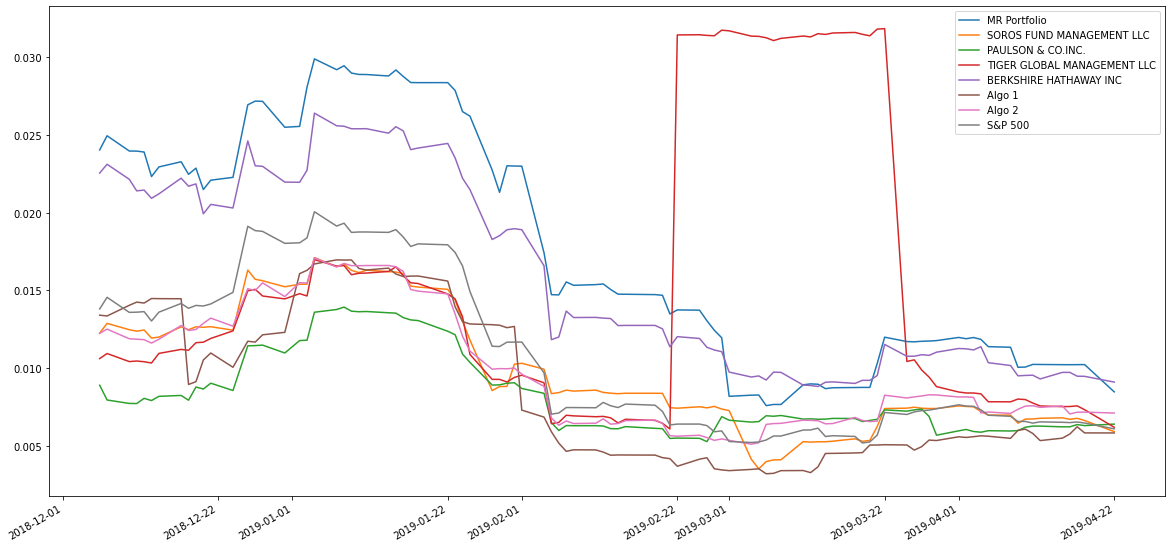

In [102]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
my_rolling_21 = total_returns_df.rolling(window = 21).std()
my_rolling_21.plot(figsize = (20,10))

In [97]:
# Annualized Sharpe Ratios
annualized_sharpe_df = (total_returns_df.mean()*252)/(total_returns_df.std()*np.sqrt(252))
annualized_sharpe_df

MR Portfolio                   0.462436
SOROS FUND MANAGEMENT LLC      1.013830
PAULSON & CO.INC.             -0.248051
TIGER GLOBAL MANAGEMENT LLC   -1.528068
BERKSHIRE HATHAWAY INC         1.344520
Algo 1                         2.249221
Algo 2                         0.801912
S&P 500                        0.835668
dtype: float64

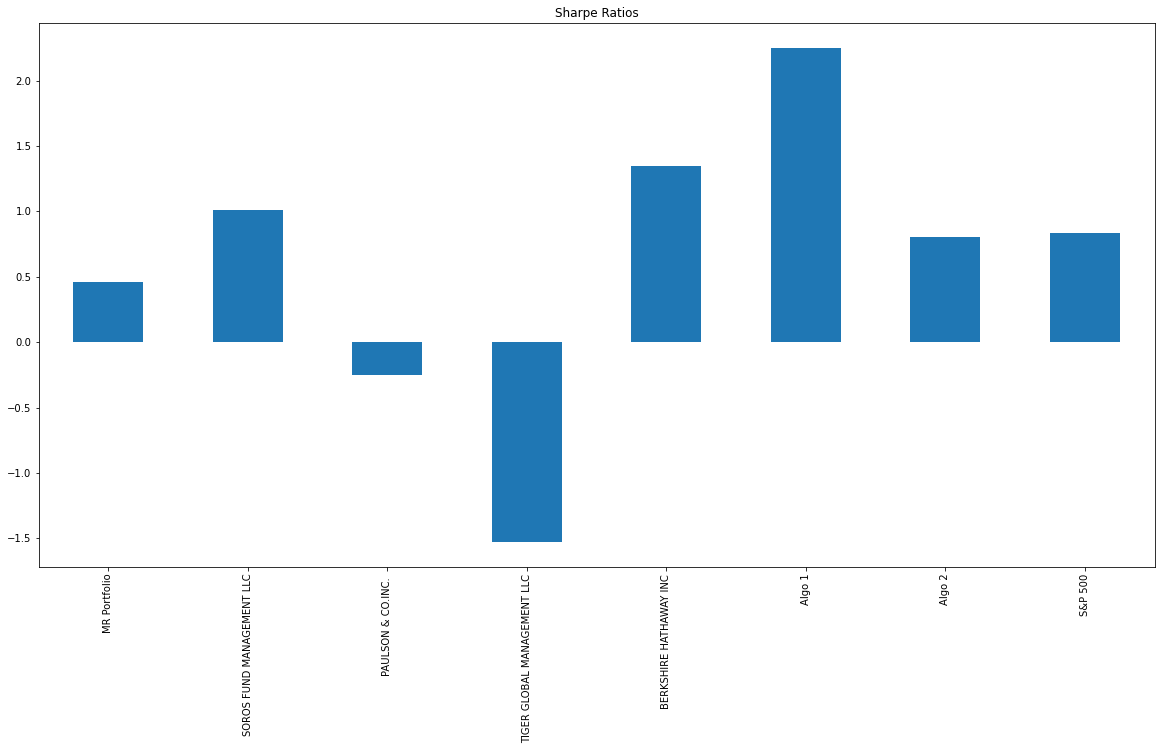

In [104]:
annualized_sharpe_df.plot.bar(figsize = (20,10), title = "Sharpe Ratios")

In [105]:
# Create a correlation analysis
correlation = total_returns_df.corr()
correlation.round(10)

,MR Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
MR Portfolio,1.000000,0.803951,0.726186,0.340168,0.890092,0.222982,0.819417,0.902331
SOROS FUND MANAGEMENT LLC,0.803951,1.000000,0.819130,0.503611,0.851433,0.292653,0.872664,0.885213
PAULSON & CO.INC.,0.726186,0.819130,1.000000,0.442887,0.699641,0.369176,0.819058,0.774881
TIGER GLOBAL MANAGEMENT LLC,0.340168,0.503611,0.442887,1.000000,0.346188,0.139995,0.399484,0.457963
BERKSHIRE HATHAWAY INC,0.890092,0.851433,0.699641,0.346188,1.000000,0.268505,0.813608,0.889719
Algo 1,0.222982,0.292653,0.369176,0.139995,0.268505,1.000000,0.373637,0.252076
Algo 2,0.819417,0.872664,0.819058,0.399484,0.813608,0.373637,1.000000,0.887990
S&P 500,0.902331,0.885213,0.774881,0.457963,0.889719,0.252076,0.887990,1.000000


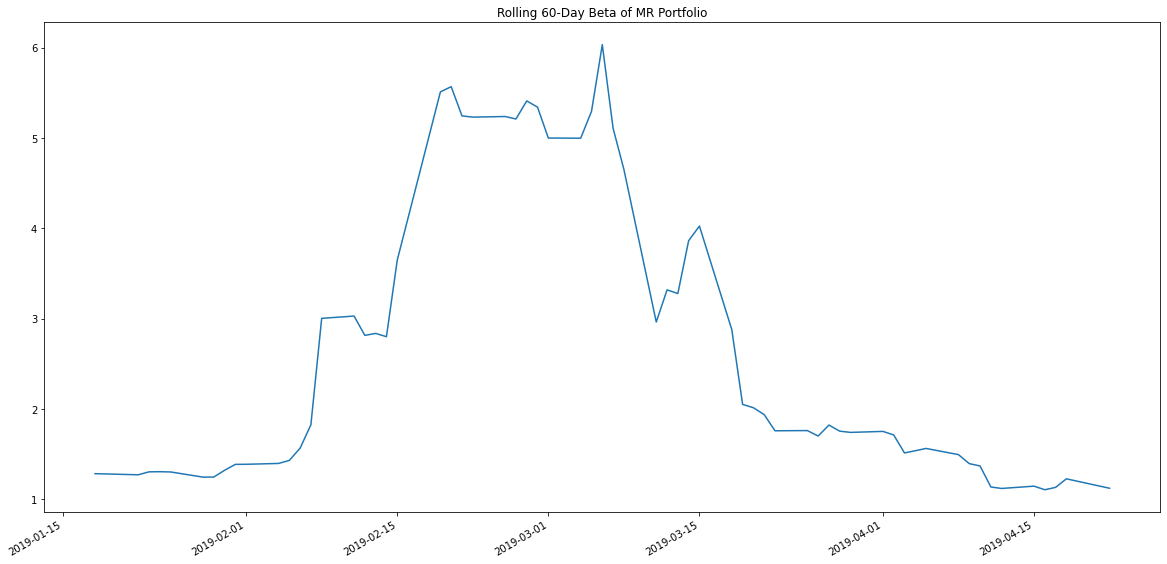

In [107]:
# Beta
rolling_covar = total_returns_df['MR Portfolio'].rolling(window=50).cov(total_returns_df['S&P 500'])
sp500_variance = combined_df['S&P 500'].rolling(window=30).var()
my_portfolio_beta = rolling_covar / sp500_variance
my_portfolio_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of MR Portfolio')
